In [20]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt,SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
#importing dataset
df=pd.read_csv("D:\\Datascience\\SSN SACE\\Project\\Analytics vidhya\\Time series\\Jetrail\\Train.csv",parse_dates=['Datetime'],index_col=['Datetime'])
df

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
...,...,...
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702


In [22]:
#dropped ID column since it is not significant to the model
df1=df.drop('ID',axis=1)

<AxesSubplot:xlabel='Datetime'>

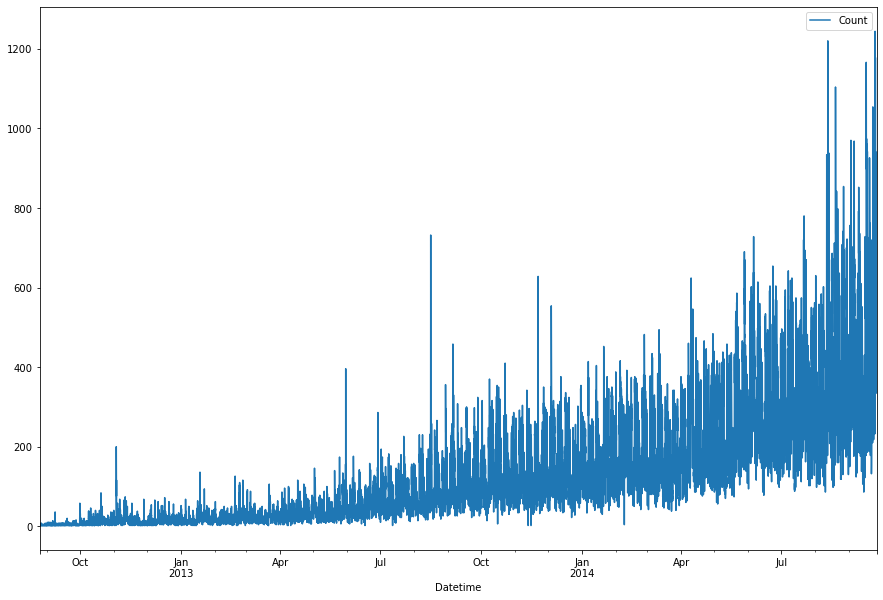

In [23]:
#visualizing the timeseries
df1.plot(figsize=(15,10))

It is observed the trend is upward with seasons

In [24]:
#resampling to daily basis for better predicting
df_daily=df1.resample('D').sum()

In [25]:
#checking the dataset
df_daily.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [26]:
#decomposing the trends, seasons and residuals in timeseries
result=seasonal_decompose(df_daily,model='multiplicative')
print(result.resid)
print(result.trend)
print(result.seasonal)
print(result.observed)

Datetime
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28    0.707822
2012-08-29    0.726508
                ...   
2014-09-21    1.062631
2014-09-22    0.955143
2014-09-23         NaN
2014-09-24         NaN
2014-09-25         NaN
Freq: D, Name: resid, Length: 762, dtype: float64
Datetime
2012-08-25             NaN
2012-08-26             NaN
2012-08-27             NaN
2012-08-28       70.857143
2012-08-29       76.000000
                  ...     
2014-09-21    12228.285714
2014-09-22    12678.571429
2014-09-23             NaN
2014-09-24             NaN
2014-09-25             NaN
Freq: D, Name: trend, Length: 762, dtype: float64
Datetime
2012-08-25    0.720619
2012-08-26    0.700469
2012-08-27    1.165663
2012-08-28    1.156432
2012-08-29    1.086669
                ...   
2014-09-21    0.700469
2014-09-22    1.165663
2014-09-23    1.156432
2014-09-24    1.086669
2014-09-25    1.089832
Freq: D, Name: seasonal, Length: 762, dtype: float64
Datetime
2012-08-

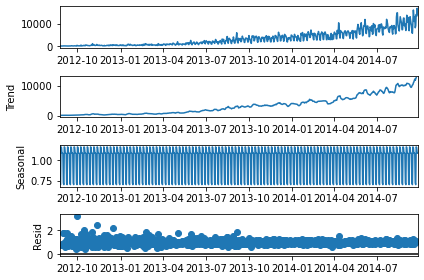

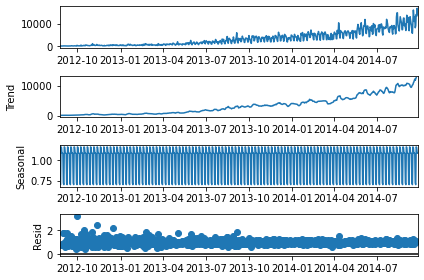

In [27]:
#visualizing the decomposed timeseries
result.plot()

The plots shows the upward trend, strong seasons and residue of timeseries

In [28]:
#splitting the dataset for train an test
df_train=df_daily[:720]
df_test=df_daily[720:]
print(df_train.shape)
print(df_test.shape)

(720, 1)
(42, 1)


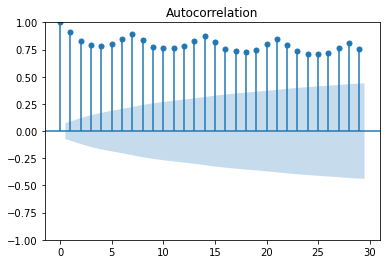

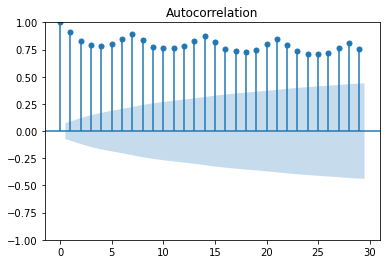

In [29]:
#visualizing the acf plots
plot_acf(df_train)

ACF plots strong corelation among data points

C:\Users\91814\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


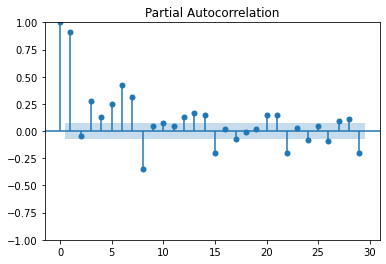

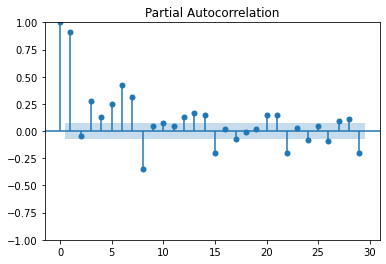

In [30]:
#visulaizing the pacf plots
plot_pacf(df_train)

PACF plot show strong correlation at initial point and some negative correlations

In [31]:
#hypothesis testing to test whether data is stationary or not 
adtest=adfuller(df_train)

In [32]:
adtest[1]

0.9985209141076885

Hypothesis resulted in timeseries as nonstationary

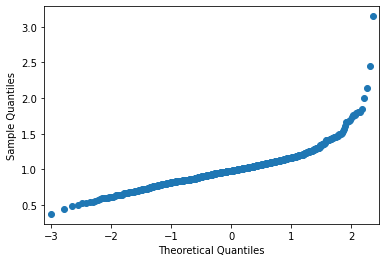

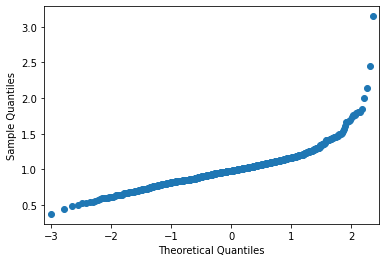

In [33]:
#checking whether all points are covered
sm.qqplot(result.resid)

QQplot shows some signals are still present data which need to be extracted

<AxesSubplot:xlabel='resid', ylabel='Count'>

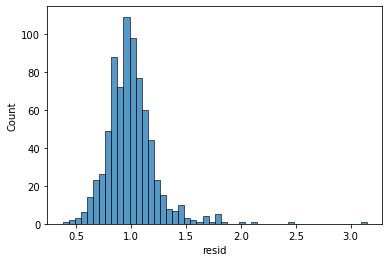

In [34]:
sns.histplot(result.resid,bins=50)

<AxesSubplot:xlabel='Datetime'>

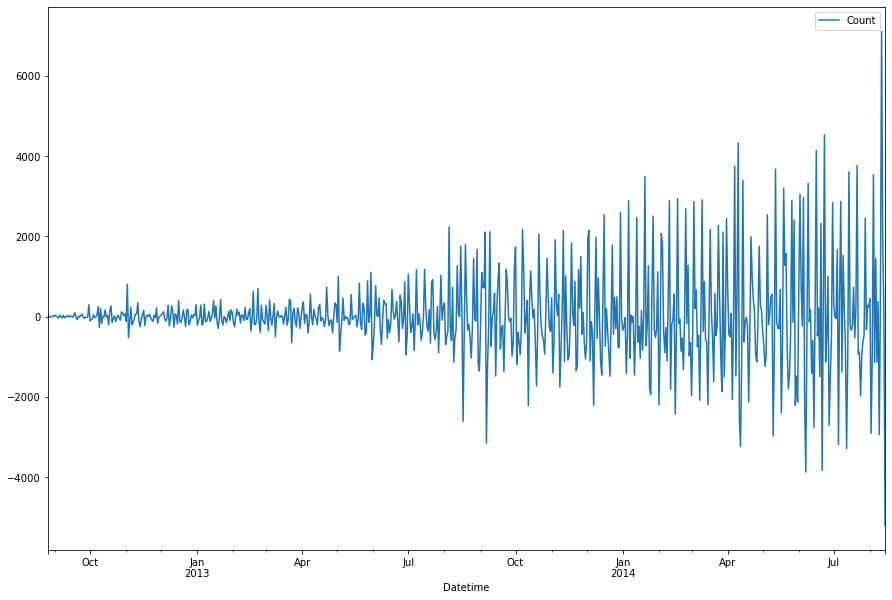

In [35]:
#differencing to remove seasons
diff_1=df_train.diff().dropna()
diff_1.plot(figsize=(15,10))

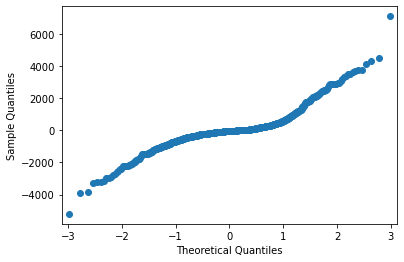

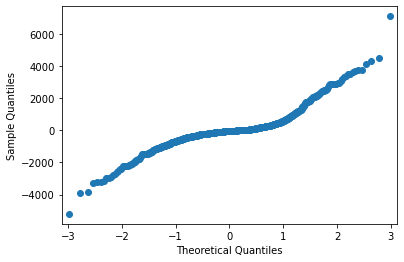

In [36]:
##checking whether all points are covered
sm.qqplot(diff_1.Count)

Almost all signals are covered in the data

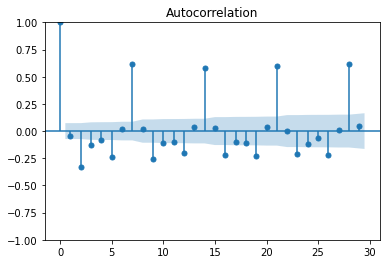

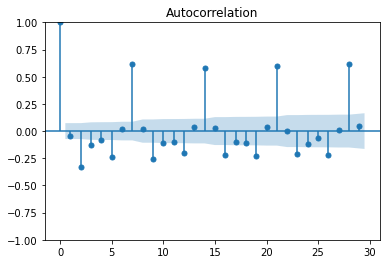

In [37]:
plot_acf(diff_1)

Differenced dataset shows correlation for every 7 points with some negative correlation in data

C:\Users\91814\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


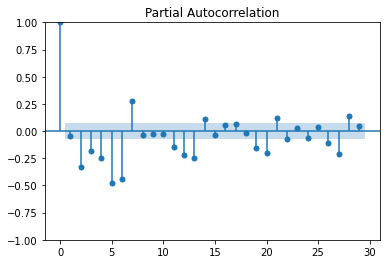

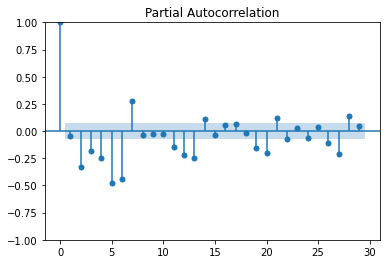

In [38]:
#partical correlation of differenced timeseries
plot_pacf(diff_1)

Differenced dataset shows strong correlation for initial points and some negative correlations also

In [39]:
##hypothesis testing to test whether data is stationary or not 
diff_1_test=adfuller(diff_1)

In [40]:
diff_1_test[1]

1.2097947449220372e-11

Hypotheseis resulted in timeseries as stationary

C:\Users\91814\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91814\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


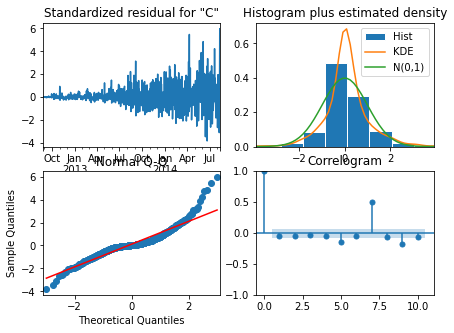

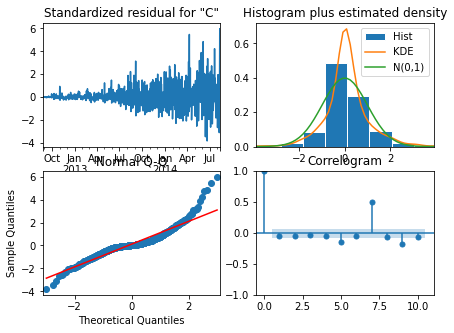

In [41]:
#arima model to forecast
model=ARIMA(df_train,order=(3,1,2))
model_fit=model.fit()
model_fit.summary()
model_fit.plot_diagnostics(figsize=(7,5))

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

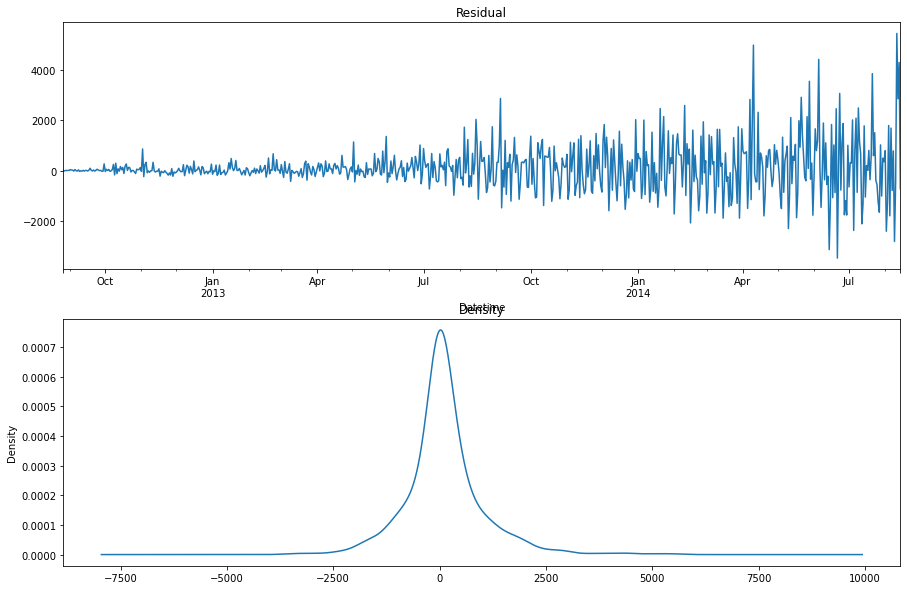

In [42]:
#ploting residual data in timeseries
residual=model_fit.resid[1:]
fig,ax=plt.subplots(2,1)
residual.plot(title='Residual',ax=ax[0],figsize=(15,10))
residual.plot(title='Density',kind='kde',ax=ax[1],figsize=(15,10))

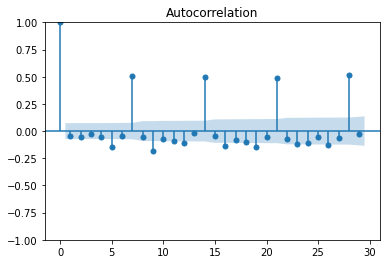

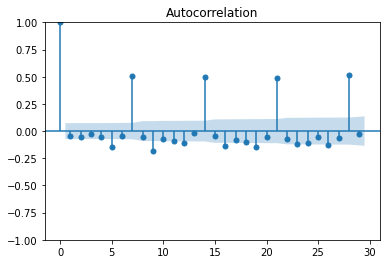

In [43]:
#correlation of residual data
plot_acf(residual)

C:\Users\91814\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


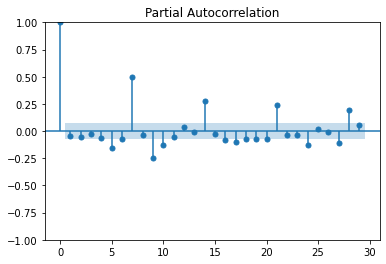

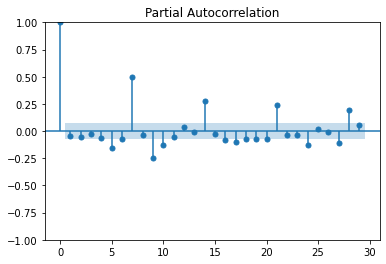

In [44]:
#partial autocorrelation of residual data
plot_pacf(residual)

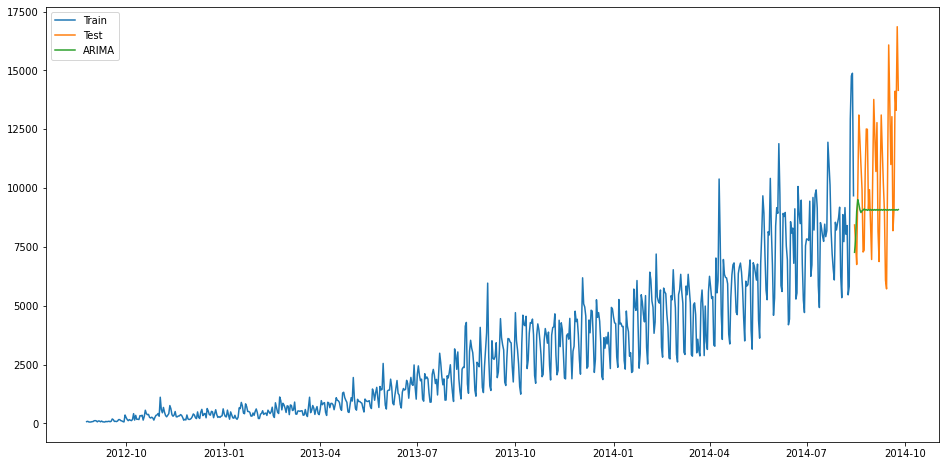

In [45]:
#forecasting  with arima model
forecast_test = model_fit.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['Count'],label='Train')
plt.plot(df_test['Count'],label='Test')
plt.plot(forecast_test,label='ARIMA')
plt.legend(loc='best')
plt.show()

In [46]:
#validating the prediction with  rmse
rms = np.sqrt(mean_squared_error(df_test.Count, forecast_test))
print(rms)

3073.7274936917856


In [47]:
#validating the prediction with  mape
mape=mean_absolute_percentage_error(df_test.Count, forecast_test)
mape

0.22491166331903828

ARIMA model didn't captured the trend and also the seasons

In [48]:
#auto arima model to forecast timeseries
auto_arima=pm.auto_arima(df_train,stepwise=False,seasonal=True)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [49]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -5885.811
Date:                Sat, 11 Mar 2023   AIC                          11785.621
Time:                        17:50:36   BIC                          11817.666
Sample:                    08-25-2012   HQIC                         11797.993
                         - 08-14-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     44.9890     36.773      1.223      0.221     -27.085     117.063
ar.L1         -0.2838      0.024    -12.060      0.000      -0.330      -0.238
ar.L2         -0.5310      0.017    -30.884      0.000      -0.565      -0.497
ar.L3         -0.4366      0.023    -19.340      0.000      -0.481      -0.392
ar.L4         -0.3610      0.024    -14.973      0.000      -0.408      -0.314
ar.L5         -0.5093      0.027    -19.191      0.000      -0.561      -0.457
sigma2      7.581e+05   2.37e+04     32.027      0.000    7.12e+05    8.05e+05
===================================================================================
Ljung-Box (L1) (Q):                  37.08   Jarque-Bera (JB):              1260.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              63.71   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

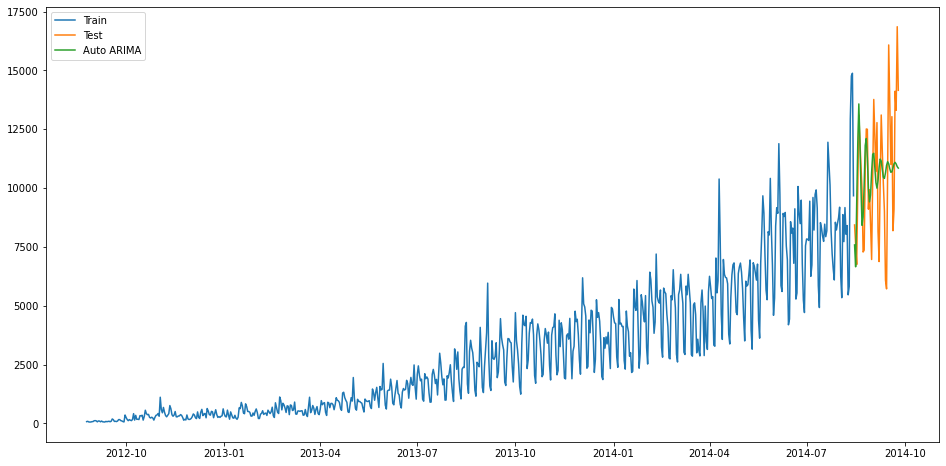

In [50]:
#forecasting with autoarima model
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['Count'],label='Train')
plt.plot(df_test['Count'],label='Test')
plt.plot(forecast_test_auto,label='Auto ARIMA')
plt.legend(loc='best')
plt.show()

In [51]:
#validating the prediction with  rmse
rms = np.sqrt(mean_squared_error(df_test.Count, forecast_test_auto))
print(rms)

2431.564871838227


In [52]:
#validating the prediction with  mape
mape=mean_absolute_percentage_error(df_test.Count, forecast_test_auto)
mape

0.20614051230524172

Auto ARIMA model captured the trend but fail to capture the seasons

C:\Users\91814\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


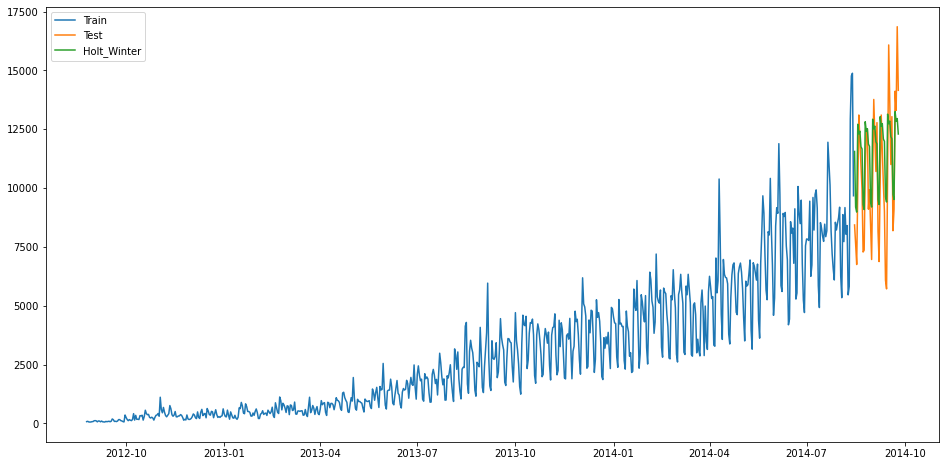

In [53]:
#forecasting tiemseries with holtwinter method
test = df_test.copy()
fit1 = ExponentialSmoothing(np.asarray(df_train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
test['Holt_Winter'] = fit1.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['Count'], label='Train')
plt.plot(df_test['Count'], label='Test')
plt.plot(test['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [54]:
#validating the prediction with  rmse
rms = np.sqrt(mean_squared_error(df_test.Count, test.Holt_Winter))
print(rms)

1987.9665013719216


In [55]:
#validating the prediction with  mape
mape=mean_absolute_percentage_error(df_test.Count, test.Holt_Winter)
mape

0.18469384500867028

HoltWinter method predicted with 18% error in prediction

C:\Users\91814\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


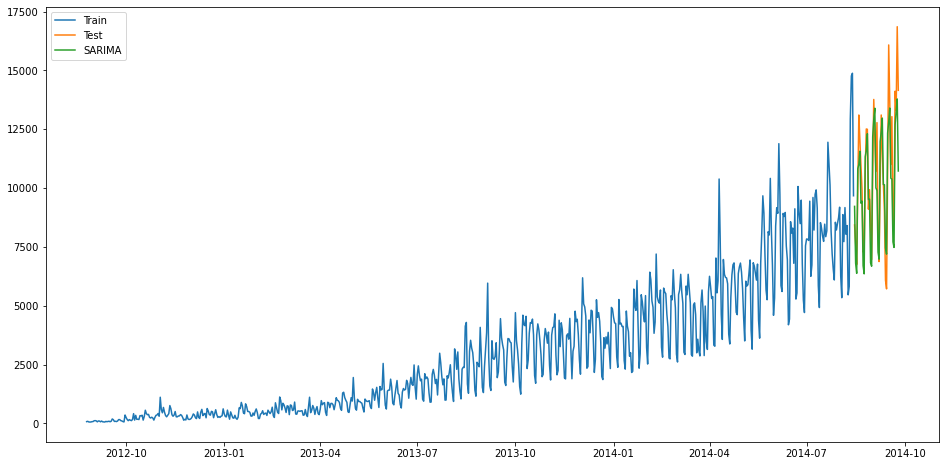

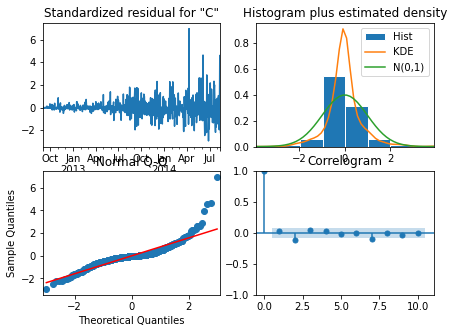

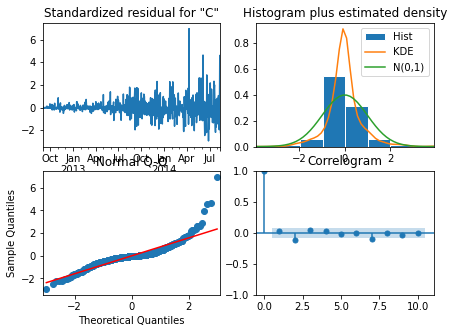

In [56]:
#forecasting timeseries with sarimax
sarimax = df_test.copy()
fit1 = SARIMAX(df_train.Count, order=(1,1,1),seasonal_order=(2,1,0,7),trend='ct').fit()
sarimax['SARIMA'] = fit1.predict(start="2014-08-15", end="2014-09-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( df_train['Count'], label='Train')
plt.plot(df_test['Count'], label='Test')
plt.plot(sarimax['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()
fit1.plot_diagnostics(figsize=(7,5))

In [57]:
#validating the prediction with  rmse
rms = np.sqrt(mean_squared_error(df_test.Count, sarimax.SARIMA))
print(rms)

1444.9816925632188


In [58]:
#validating the prediction with  mape
mape=mean_absolute_percentage_error(df_test.Count, sarimax.SARIMA)
mape

0.10748129789242457

Sarimax forecasted the timeseries with 10% error in prediction

Among all models SARIMAX model forecasted with least error and also captured the trends and seasonality